<a href="https://colab.research.google.com/github/murali-marimekala/tensorflow_deeplearning_bootcamp/blob/main/3_Neural_Network_Regressions_with_Tensorflow/Neural_Network_Regressino_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

# Regression inputs and outputs

Inputs -> Machine learning algorithm -> Outputs

## What is Regression problem ?

If you are planning to predict a house price with available variables like number of rooms , bathrooms, squarefoot etc, then you are dealing with a regression problem.

## How are you going to solve it ?

Understand inputs (independent variable) and outputs (dependent variables).

Inputs features can be number of rooms, bathrooms etc. Try creating a data using one-hot encoding (which is learnt earlier).  Looks if someone has already created a machine learning algorithm (for example supervised learning algorithm) for your problem online. If you cant find you can implement by yourself. Finally output can be a price predicted of the house from the inputs you shared through iput.

Here numerical encoding of indepedent variables in the form of tensor.

# Anatomy of Neural Networks (NN)

Input layers -> Hidde layers -> Output layers

With hidden layers, the neural network learns the pattern.

## What does the NN regression algorithm look like ?

Hyper Parameters we need to consdier are


1. Input layer shape
2. Hidden layer(s)
3. Neurons per hidden layer
4. Output layer shape
5. Hidden activation
6. Output activation
7. Loss function
8. Optimizer


## Here in this Housing problem
1. Input layers are number of bathrooms, rooms etc.
2. Hidden layers: Problem specific 1 to unlimited
3. Neurons per hidden layer: generally 0 to 100
4. Output layer shape : same shape as desired prediction shape (eg. 1 for house price)
5. Hidden activation : Usually ReLU (Rectified Linear unit).
6. Output activation : None, ReLu , logistic/tanh
7. Loss function: MSE (Mean square error) or MAE  (Mean absolute error) / Huber (Combination of MAE/MSE) if outliers
8. Optimizer : SGD stochastic gradient descent , Adam






# Introduction to Regressions with NN in tensor flow.

There are many definitions for a regression problem but in our case, we are going to simplify it. Predictig numerical variabel absed on some other combination of variabels even sorter predicting a number.


In [5]:
import tensorflow as tf
print(tf.__version__)

2.18.0


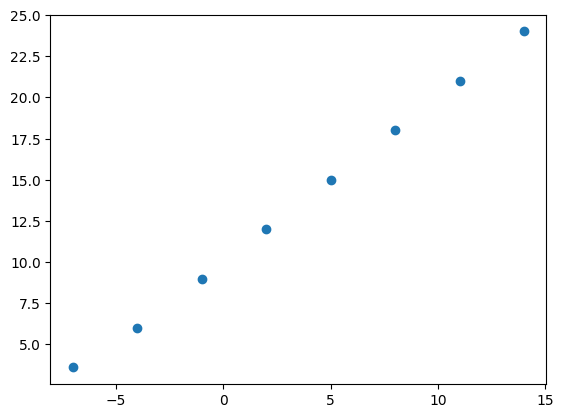

In [6]:
#Creating data to view and fit

import numpy as np
import matplotlib.pyplot as plt

#Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

#Create labels
y = np.array([3.6, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])


#Visualize it
plt.scatter(X, y)

Lets try to work pattern between X and y

In [7]:
X + 10

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

In [8]:
y == X + 10


array([False,  True,  True,  True,  True,  True,  True,  True])

Input and Output shapes

In [9]:
#Create Demo tensor for our housing price predictio problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
print(house_info)

house_price = tf.constant([939700])
print(house_price)

house_info.shape, house_price.shape

tf.Tensor([b'bedroom' b'bathroom' b'garage'], shape=(3,), dtype=string)
tf.Tensor([939700], shape=(1,), dtype=int32)


(TensorShape([3]), TensorShape([1]))

In [10]:
X[0], y[0]

(-7.0, 3.6)

In [11]:
X[1], y[1]

(-4.0, 6.0)

In [12]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [13]:
X[0].ndim

0

In [14]:
X[0], y[0]

(-7.0, 3.6)

##Turnig  Numpy Arrays into tensors

In [15]:

X = tf.cast(tf.constant(X),  dtype=tf.float32)
y = tf.cast(tf.constant(y),  dtype=tf.float32)
X = tf.reshape(X, shape=(8,1))
y = tf.reshape(y, shape=(8,1))
X, y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[ 3.6],
        [ 6. ],
        [ 9. ],
        [12. ],
        [15. ],
        [18. ],
        [21. ],
        [24. ]], dtype=float32)>)

In [16]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([1]), TensorShape([1]))

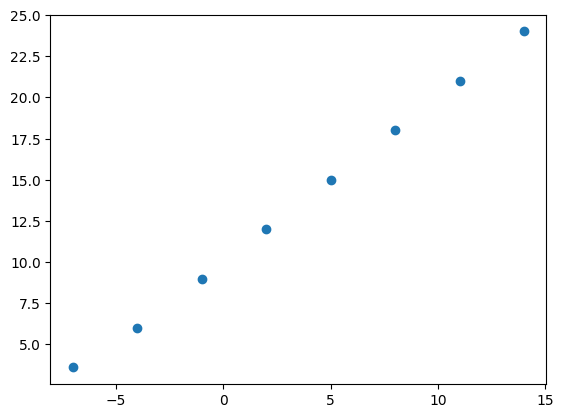

In [17]:
plt.scatter(X, y)

##Steps in modelling with Tensorflow

1. Creating a model - define the input and output layers, as well as the hidden layers of a deep learning model.
2. Compiling a model - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our models how to improve the patterns its learning) and evalutation metrics (what we can use to interpret the performance of our model).
3. Fitting a model - letting the model try to find the patterns between x and y (Features and labels)

In [18]:
#Set random seed
tf.random.set_seed(42)

print(X)
#1. Create a model using the Sequential api
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss = tf.keras.losses.mae, #mean absolute error : Comparision of prediction vs observed
              optimizer = tf.keras.optimizers.SGD(), #Stochastic radiant descent
              metrics = ["mae"])

#3.Fit the model
model.fit(X, y, epochs=5)


tf.Tensor(
[[-7.]
 [-4.]
 [-1.]
 [ 2.]
 [ 5.]
 [ 8.]
 [11.]
 [14.]], shape=(8, 1), dtype=float32)
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 681ms/step - loss: 8.6996 - mae: 8.6996
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 8.5671 - mae: 8.5671
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 8.4346 - mae: 8.4346
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 8.3021 - mae: 8.3021
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 8.1696 - mae: 8.1696


In [19]:
X, y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[ 3.6],
        [ 6. ],
        [ 9. ],
        [12. ],
        [15. ],
        [18. ],
        [21. ],
        [24. ]], dtype=float32)>)

In [20]:
#Try predicting the model
new_input = tf.constant([17.0,0])
y_predict = model.predict(new_input)
y_predict


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


array([[26.705559],
       [ 0.05    ]], dtype=float32)

In [21]:
#added prediction + mae
y_predict = y_predict + 10.7413
y_predict

array([[37.446857],
       [10.7913  ]], dtype=float32)

## Improve our Model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons)
within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization fucntion.
3. **Fitting a model** -Here we might fit model for more **epochs** (leave it training for long time)
  

In [22]:
#Lets rebuild the model

#1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics = ["mae"])

#3. Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 14.8732 - mae: 14.8732
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 13.9855 - mae: 13.9855
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 13.1118 - mae: 13.1118
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 12.2573 - mae: 12.2573
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 11.4113 - mae: 11.4113
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 10.5728 - mae: 10.5728
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 9.7358 - mae: 9.7358
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 9.0613 - mae: 9.0613
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 8.4171 - mae: 8.4171
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 7.7694 - mae: 7.7694
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 7.1009 - mae: 7.1009
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 6.4007 - mae: 6.4007
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

In [23]:
#Lets predict now
new_input = tf.constant([17.0,0])
y_predict = model.predict(new_input)
y_predict

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


array([[27.564157],
       [10.11418 ]], dtype=float32)

We were expecting value of y predicted is 27. Its almost near with an mae 0.2162 and loss : 0.2163. Lets try increasing layer and check

In [24]:
#Can we do better lets see
#1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)])

#2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics = ["mae"])

#3. Fit the model
model.fit(X, y, epochs=100)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 14.5639 - mae: 14.5639
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 14.0440 - mae: 14.0440
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 13.5557 - mae: 13.5557
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 13.0945 - mae: 13.0945
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 12.6565 - mae: 12.6565
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 12.2263 - mae: 12.2263
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 11.8022 - mae: 11.8022
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 11.3851 - mae: 11.3851
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 10.9983 - mae: 10.9983
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 10.5958 - mae: 10.5958
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 10.1912 - mae: 10.1912
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 9.7696 - mae: 9.7696
Epoch 13/100
1/1 ━━━━━━━━━━

In [25]:
#Lets predict again
new_input = tf.constant([17.0,0])
y_predict = model.predict(new_input)
y_predict

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


array([[31.46232  ],
       [ 2.6706653]], dtype=float32)

Looks our model is overfitting it means it has learnt the data very well that is leading to a problem. It should be well balanced. Here the key hyper parameter we tweaked is learning rate apart from adding a new layer. Lets revert it back to 0.01 instead of 0.001 and see if the model predicts y value perfectly.

In [26]:
#Lets try with Adam learning rate 0.01 instead of 0.001

#1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

#3.Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 12.9291 - mae: 12.9291
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step - loss: 10.4660 - mae: 10.4660
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step - loss: 8.2824 - mae: 8.2824
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step - loss: 6.2112 - mae: 6.2112
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - loss: 4.0182 - mae: 4.0182
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step - loss: 4.8146 - mae: 4.8146
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step - loss: 5.7161 - mae: 5.7161
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 5.8756 - mae: 5.8756
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 5.5026 - mae: 5.5026
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 4.8101 - mae: 4.8101
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 3.9944 - mae: 3.9944
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 3.6641 - mae: 3.6641
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [29]:
#Lets predict now
new_input = tf.constant([17.0,0])
y_predict = model.predict(new_input)
y_predict

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


array([[26.289452],
       [10.165991]], dtype=float32)

Tried with 3 dense layers still the model was overfitting slightly so reduced one layer and learning rate 0.01, it predicts fine.

##Evaluating the model
Typical flow is like
1. Create Model
2. Compile Model
3. Fit Model
4. Predict
5. Tweak the Model by changing hyper parameters.
6. Repeat 1 to 4

When Evaluating the models we always need to **visualize**.

*Visualize the data : What data are we working with. What does it look like.
*Visualize the model :What does our model look like ?
*Visualize the training model : How does the model perform while it learns
*Visualize predictions of the model: How do the predictions of a model line up against the ground truth (the original labels).



In [28]:
#Make a bigger data set
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [30]:
#Make labels for the data set
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

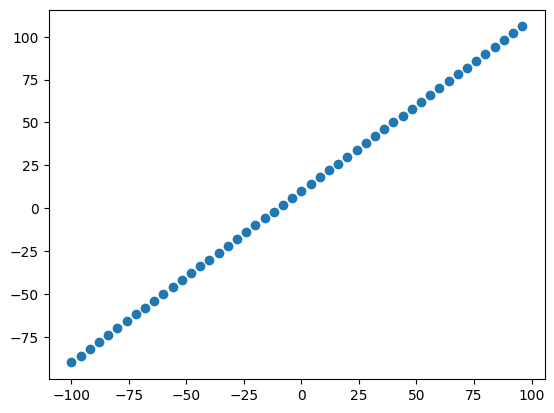

In [31]:
#visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

###The concepts of 3 sets
***Set-1: Training Set*** : Model learns from this data (70 to 80% of the total we have available). Analogy is your course material.

***Set-2 : Validation set*** : Models gets tuned on this data, which is typically 10 to 15% of data available. Analogy is practice exam

***Set-3 : Test set*** : The model gets evaluated on this data to test what has learned, this set is typically 10-15% of the total data vailable. Analogy is Final exam.

In [33]:
#Check the lenght of how many samples we have
len(X)

50

In [36]:
#Split the data into train and test sets
X_train = X[:40] #First 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:]  #Last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

###Visualizing the data
Now we have got our data in training and test sets. Lets visualize again

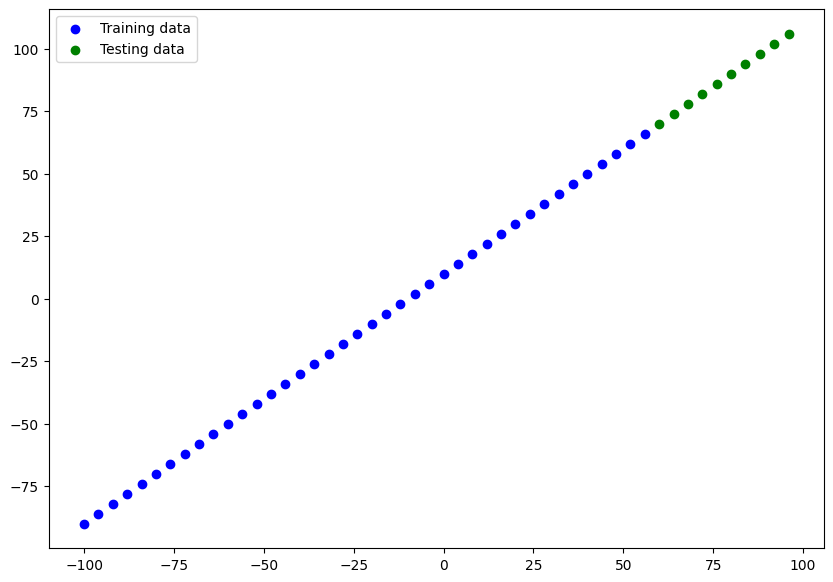

In [38]:
plt.figure(figsize=(10, 7))
#Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")

#Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")

#Show the legend
plt.legend()

###Lets look at how to build NN for our existing data. We did this earlier. But we will recreate again.

In [53]:
#Reshape X_train and X_test to have an added dimension for batch size
X_train = tf.expand_dims(X_train, axis=-1)
X_test = tf.expand_dims(X_test, axis=-1)

#Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss= tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

#3. Fit the model
model.fit(X_train, y_train, epochs=100)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 60.1507 - mae: 60.1507 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 45.4982 - mae: 45.4982
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 41.9645 - mae: 41.9645
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 41.4644 - mae: 41.4644
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 41.1914 - mae: 41.1914
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 41.0797 - mae: 41.0797
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 41.0509 - mae: 41.0509
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 41.0427 - mae: 41.0427
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 41.0402 - mae: 41.0402
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 41.0390 - mae: 41.0390 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - loss: 41.0382 - mae: 41.0382
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 41.0375 - mae: 41.0375 
Epoch 13/100
2/2 ━━━━

#Visualizing the model

In [41]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Shape of data that we are passing the model


In [42]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [47]:
#Lets create a model which builds automatically by defining the input shape argument

tf.random.set_seed(42)
#create the model
model =  tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]) #Dense means fully connected layer. All neurons connected to all neurons in next layer
])

#2. Compile the model
model.compile(loss= tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])
#3. Fit the model
model.fit(X_train, y_train, epochs=100)

In [50]:
model.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

* Total Params - total number of
parameters in the model.
* Trainable parameters - These are the parameters (patterns) the model can update as it trains.
*Non-trainable params : These parameters are not updated during training. This is typical when you bring in already learning parameters or patterns from other models during **transfer learning**)


Resources:For more in-depth overview of trainable parameters within layer, checkout MIT's introduction to deep learning video. URL : https://introtodeeplearning.com/

In [56]:
#Lets fit our model to training data
model.fit(X_train, y_train, epochs=100, verbose=1) #verbose 0 is no output

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 40.9819 - mae: 40.9819
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 40.9812 - mae: 40.9812
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 40.9807 - mae: 40.9807
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 40.9941 - mae: 40.9941
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 40.9857 - mae: 40.9857
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 40.9828 - mae: 40.9828
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 40.9818 - mae: 40.9818
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 40.9808 - mae: 40.9808
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 40.9800 - mae: 40.9800
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 40.9793 - mae: 40.9793
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 40.9794 - mae: 40.9794
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 40.9919 - mae: 40.9919
Epoch 13/100
2/2 ━━━━━━━━

In [57]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 1, 1, 1, 1)          │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)